In [100]:
a = list(range(3))
print(a)
import numpy as np
b = list(np.arange(10, 13, 0.4))
print(b, len(b))

[0, 1, 2]
[10.0, 10.4, 10.8, 11.200000000000001, 11.600000000000001, 12.000000000000002, 12.400000000000002, 12.800000000000002] 8


In [9]:

def test(k, g):
    for i in list(range(3)):
        df = {}
        dic = {}
        for i in g:
            for j in k:    
                dic1 = {'fpr': [], 'tpr': [], 'roc_auc': []}
                dic2 = {'precision': [], 'recall': [], 'f1': [], 'conf_matix': []}
                dic[j] = [dic1, dic2]
            df[i] = [dic]
            
    return df
    
g = ['a', 'b', 'c']
k = [1, 2, 3]
df= test(k, g)
# print(df)
# print(df[g[0]])
# print(df[g[0]][0])
# print(df[g[0]][0][k[0]][0])
# print(dic[k[0]][0]['fpr'])


def test2(g):
    for i in list(range(3)):
        df = {}
        for i in g:  
            dic1 = {'fpr': [], 'tpr': [], 'roc_auc': []}
            dic2 = {'precision': [], 'recall': [], 'f1': [], 'conf_matix': []}
            df[i] = [dic1, dic2]
            
    return df
    
g = ['a', 'b', 'c']
k = [1, 2, 3]
df= test2(g)
# print(df)
# print(df[g[0]])
print(df[g[0]][1])

{'precision': [], 'recall': [], 'f1': [], 'conf_matix': []}


In [72]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score, recall_score, f1_score, auc
from sklearn.model_selection import train_test_split
from keras import layers, Model
from keras.models import Sequential, load_model
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras import regularizers, layers, losses
from keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.metrics import precision_recall_curve, confusion_matrix, roc_curve, PrecisionRecallDisplay
from keras.utils import plot_model
import pandas as pd
import seaborn as sns
import joblib
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

(40000, 14)


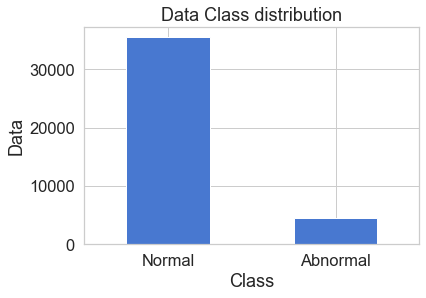

In [73]:
# Generate some sample data for the autoencoder
# x_train = np.random.rand(1000, 12)
# x_test = np.random.rand(100, 12)

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

# rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

df = pd.read_csv("Autoencoder_wind.csv")  
print(df.shape)

LABELS = ["Normal", "Abnormal"]

count_classes =pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Data Class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Data")
plt.show();

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from cmath import pi

data = df.drop(['Time'], axis=1)
y_true = df['Class']

r2d = 180/pi

data['P'] = r2d * data['P']
data['Q'] = r2d * data['Q']
data['R'] = r2d * data['R']
data['Phi'] = r2d * data['Phi']
data['Theta'] = r2d * data['Theta']
data['Psi'] = r2d * data['Psi']

In [74]:
X_train, X_test = train_test_split(data, test_size=0.5, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
y_train = X_train['Class']
X_train = pd.DataFrame(X_train)
X_train = X_train.drop(['Class'], axis=1)

# X_test = X_test[X_test.Class == 0]
y_test = X_test['Class']
X_test = pd.DataFrame(X_test)
X_test = X_test.drop(['Class'], axis=1)

# def normalize(label):
#     str = StandardScaler()
#     str.fit(X_train[label].values.reshape(-1, 1))
#     X_train[label] = str.transform(X_train[label].values.reshape(-1, 1))
#     X_test[label] = str.transform(X_test[label].values.reshape(-1, 1))

# def normalize1(label):
#     str = MinMaxScaler()
#     str.fit(X_train[label].values.reshape(-1, 1))
#     X_train[label] = str.transform(X_train[label].values.reshape(-1, 1))
#     X_test[label] = str.transform(X_test[label].values.reshape(-1, 1))

# A = ['RPM1', 'RPM2', 'RPM3', 'RPM4', 'RPM5', 'RPM6', 'P', 'Q', 'R', 'Phi', 'Theta', 'Psi']

# for i in A:
#     normalize1(i)

def MinmaxNorm(data1, data2, label):
    for i in label:
        a = data1[i]
        b = data2[i]
        x_max = max(a)
        x_min = min(a)
        for j in list(range(a.shape[0])):
            a.iloc[j] = (a.iloc[j] - x_min) / (x_max - x_min)
        for k in list(range(b.shape[0])):
            b.iloc[k] = (b.iloc[k] - x_min) / (x_max - x_min)
    
    return data1, data2

A = ['RPM1', 'RPM2', 'RPM3', 'RPM4', 'RPM5', 'RPM6', 'P', 'Q', 'R', 'Phi', 'Theta', 'Psi']

X_train, X_test = MinmaxNorm(X_train, X_test, A)

# Add noise 
noise = 0.5
X_train_noisy = X_train + noise * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

X_train = X_train.values
X_test = X_test.values

X_train_noisy = X_train_noisy.values
X_test_noisy = X_test_noisy.values

In [ ]:
k = load_model('AE2_h8_l4')
pred1 = k.predict(X_train)
pred2 = k.predict(X_test)
mse = np.mean(np.power((X_train - pred1), 2), axis=1)
mse2 = np.mean(np.power((X_test - pred2), 2), axis=1)
rmse1 = np.sqrt(mse)
rmse2 = np.sqrt(mse2)
thresholds = max(rmse1)
error_df = pd.DataFrame({'reconstruction_error': rmse2,
                        'true_class': y_test})

error_df.reconstruction_error = error_df.reconstruction_error >= thresholds
error_df['reconstruction_error'] = error_df['reconstruction_error'].astype(int)

y_pred = error_df.reconstruction_error
precision, recall, thresholds1 = precision_recall_curve(y_test, y_pred)
fpr, tpr, thresholds2 = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

k = load_model('DAE2_h8_l4')
pred1 = k.predict(X_train)
pred2 = k.predict(X_test)
mse = np.mean(np.power((X_train - pred1), 2), axis=1)
mse2 = np.mean(np.power((X_test - pred2), 2), axis=1)
rmse1 = np.sqrt(mse)
rmse2 = np.sqrt(mse2)
thresholds = max(rmse1)
error_df = pd.DataFrame({'reconstruction_error': rmse2,
                        'true_class': y_test})

error_df.reconstruction_error = error_df.reconstruction_error >= thresholds
error_df['reconstruction_error'] = error_df['reconstruction_error'].astype(int)

y_pred = error_df.reconstruction_error
precision_2, recall_2, thresholds3 = precision_recall_curve(y_test, y_pred)
fpr_2, tpr_2, thresholds4 = roc_curve(y_test, y_pred)
roc_auc_2 = auc(fpr, tpr)
f1_2 = f1_score(y_test, y_pred)
conf_matrix_2 = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 8))
plt.plot(precision, recall, label='F1 score= %0.4f'% f1)
plt.legend(loc='lower left', prop={'size': 10})
plt.xlim([-0.001, 1.0])
plt.ylim([0.0, 1.001])
plt.title("Precision-Recall curve ({})".format('AE2_h8_l4'))
plt.xlabel('Precision')
plt.ylabel('Recall')

plt.figure(figsize=(8, 8))
plt.plot(precision_2, recall_2, label='F1 score= %0.4f'% f1_2)
plt.legend(loc='lower left', prop={'size': 10})
plt.xlim([-0.001, 1.0])
plt.ylim([0.0, 1.001])
plt.title("Precision-Recall curve ({})".format('DAE2_h8_l4'))
plt.xlabel('Precision')
plt.ylabel('Recall')

LABELS = ["Normal", "Abnormal"]
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, 
            annot=True, fmt="d", annot_kws={'size': 20}, cmap="YlGnBu", 
            vmin=0, vmax=4000);
plt.text(0.05, 0.1, 'True Positive Rate', color="red", fontsize=13, fontweight="bold")
plt.text(1.05, 0.1, 'False Negative Rate', color="red", fontsize=13, fontweight="bold")
plt.text(0.05, 1.1, 'False Positive Rate', color="red", fontsize=13, fontweight="bold")
plt.text(1.05, 1.1, 'True Negative Rate', color="red", fontsize=13, fontweight="bold")
plt.title("Confusion matrix")
plt.xlabel('Predicted class')
plt.ylabel('True class')

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix_2, xticklabels=LABELS, yticklabels=LABELS, 
            annot=True, fmt="d", annot_kws={'size': 20}, cmap="YlGnBu", 
            vmin=0, vmax=4000);
plt.text(0.05, 0.1, 'True Positive Rate', color="red", fontsize=13, fontweight="bold")
plt.text(1.05, 0.1, 'False Negative Rate', color="red", fontsize=13, fontweight="bold")
plt.text(0.05, 1.1, 'False Positive Rate', color="red", fontsize=13, fontweight="bold")
plt.text(1.05, 1.1, 'True Negative Rate', color="red", fontsize=13, fontweight="bold")
plt.title("Confusion matrix")
plt.xlabel('Predicted class')
plt.ylabel('True class')

plt.show()

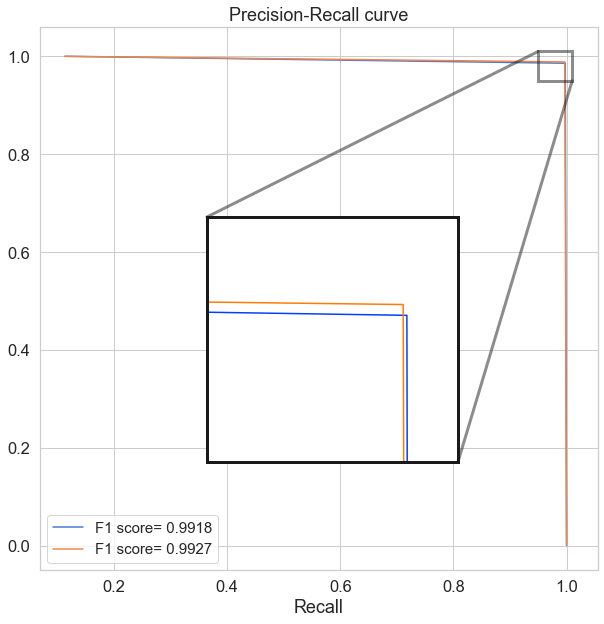

In [79]:
fig, ax = plt.subplots(figsize=[10, 10])
sns.set_palette("bright")

ax.plot(precision, recall, label='F1 score= %0.4f'% f1)
ax.plot(precision_2, recall_2, label='F1 score= %0.4f'% f1_2)
ax.set_xlabel("Precision")
ax.set_xlabel("Recall")
ax.set_title("Precision-Recall curve")
ax.legend(loc='lower left', prop={'size': 15})

axins = ax.inset_axes([0.3, 0.2, 0.45, 0.45])

# plot

axins.plot(precision, recall, label='F1 score= %0.4f'% f1)
axins.plot(precision_2, recall_2, label='F1 score= %0.4f'% f1_2)

x1, x2, y1, y2 = 0.95, 1.01, 0.95, 1.01
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

for axis in ['top', 'bottom', 'left', 'right']:
    axins.spines[axis].set_linewidth(3)
    axins.spines[axis].set_color('k')

axins.set_xticks([])
axins.set_yticks([])
axins.grid()

# indicator = ax.indicate_inset_zoom(axins, edgecolor="black", linewidth = 3)
indicator = ax.indicate_inset_zoom(axins)
indicator[0].set_linewidth(3)
indicator[0].set_edgecolor('k')
# indicator[0].set_color('k')

indicator[1][0].set_linewidth(3)
indicator[1][1].set_linewidth(3)
indicator[1][2].set_linewidth(3)
indicator[1][3].set_linewidth(3)

indicator[1][1].set_color('k')
indicator[1][2].set_color('k')



In [100]:
def calculate_result(Model_Name):
    df = {}
    k = load_model(Model_Name)
    pred1 = k.predict(X_train)
    pred2 = k.predict(X_test)
    mse = np.mean(np.power((X_train - pred1), 2), axis=1)
    mse2 = np.mean(np.power((X_test - pred2), 2), axis=1)
    rmse1 = np.sqrt(mse)
    rmse2 = np.sqrt(mse2)
    thresholds = max(rmse1)
    error_df = pd.DataFrame({'reconstruction_error': rmse2,
                            'true_class': y_test})

    error_df.reconstruction_error = error_df.reconstruction_error >= thresholds
    error_df['reconstruction_error'] = error_df['reconstruction_error'].astype(int)

    y_pred = error_df.reconstruction_error
    precision, recall, thresholds1 = precision_recall_curve(y_test, y_pred)
    fpr, tpr, thresholds2 = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    dic1 = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}
    dic2 = {'precision': precision, 'recall': recall, 'f1': f1, 'conf_matix': conf_matrix}
    df[Model_Name] = [dic1, dic2]
    
    return df

def calculate_result2(Model_Name, AE_model, GMM_model, rate):
    df = {}
    dic = {}
    k = load_model(AE_model)
    encoded_test_data = k.encoder(X_test).numpy()
    l = joblib.load(GMM_model)
    scores=l.score_samples(encoded_test_data)

    for n in rate:
        threshold = np.percentile(scores, n)
        y_pred = np.zeros_like(scores)
        y_pred[scores < threshold] = 1
        precision, recall, thresholds1 = precision_recall_curve(y_test, y_pred)
        fpr, tpr, thresholds2 = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        f1 = f1_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        dic1 = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}
        dic2 = {'precision': precision, 'recall': recall, 'f1': f1, 'conf_matix': conf_matrix}
        dic[n] = [dic1, dic2]

    df[Model_Name] = [dic]
        
    return df

Text(0, 0.5, 'Recall')

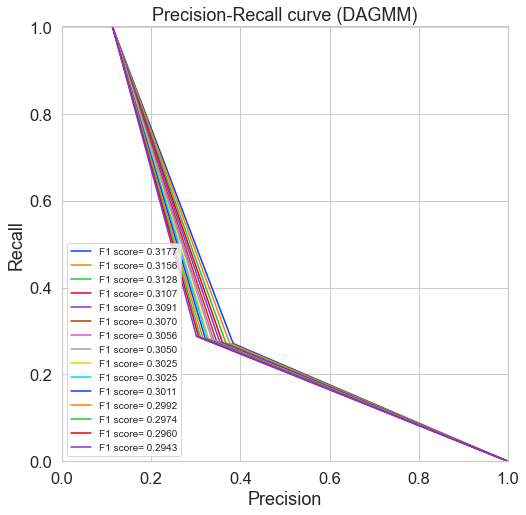

In [104]:
rate = list(np.arange(8,11,0.2))
df3 = calculate_result2("DAGMM","DAGMM_AE_h8_l4","DAGMM_GMM_h8_l4_n1.pkl", rate)

plt.figure(figsize=(8, 8))
for n in rate:
    plt.plot(df3["DAGMM"][0][n][1]['precision'], df3["DAGMM"][0][n][1]['recall'], label='F1 score= %0.4f'% df3["DAGMM"][0][n][1]['f1'])
    plt.legend(loc='lower left', prop={'size': 10})
    plt.xlim([-0.001, 1.0])
    plt.ylim([0.0, 1.001])
    plt.title("Precision-Recall curve ({})".format("DAGMM"))
    plt.xlabel('Precision')
    plt.ylabel('Recall')


625/625 [==============================] - 0s 701us/step


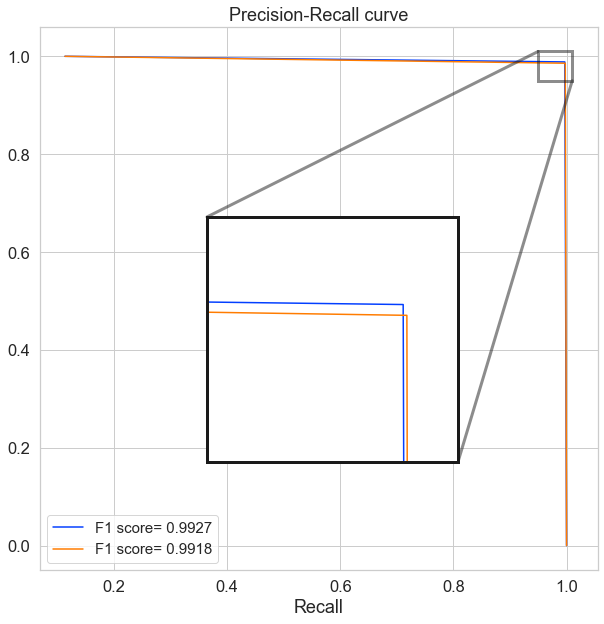

In [89]:
df = calculate_result("AE2_h8_l4")
df2 = calculate_result("DAE2_h8_l4")

fig, ax = plt.subplots(figsize=[10, 10])
sns.set_palette("bright")

ax.plot(df2["DAE2_h8_l4"][1]['precision'], df2["DAE2_h8_l4"][1]['recall'], label='F1 score= %0.4f'% df2["DAE2_h8_l4"][1]['f1'])
ax.plot(df["AE2_h8_l4"][1]['precision'], df["AE2_h8_l4"][1]['recall'], label='F1 score= %0.4f'% df["AE2_h8_l4"][1]['f1'])
ax.set_xlabel("Precision")
ax.set_xlabel("Recall")
ax.set_title("Precision-Recall curve")
ax.legend(loc='lower left', prop={'size': 15})

axins = ax.inset_axes([0.3, 0.2, 0.45, 0.45])

axins.plot(df2["DAE2_h8_l4"][1]['precision'], df2["DAE2_h8_l4"][1]['recall'], label='F1 score= %0.4f'% df2["DAE2_h8_l4"][1]['f1'])
axins.plot(df["AE2_h8_l4"][1]['precision'], df["AE2_h8_l4"][1]['recall'], label='F1 score= %0.4f'% df["AE2_h8_l4"][1]['f1'])

x1, x2, y1, y2 = 0.95, 1.01, 0.95, 1.01
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

for axis in ['top', 'bottom', 'left', 'right']:
    axins.spines[axis].set_linewidth(3)
    axins.spines[axis].set_color('k')

axins.set_xticks([])
axins.set_yticks([])
axins.grid()

# indicator = ax.indicate_inset_zoom(axins, edgecolor="black", linewidth = 3)
indicator = ax.indicate_inset_zoom(axins)
indicator[0].set_linewidth(3)
indicator[0].set_edgecolor('k')
# indicator[0].set_color('k')

indicator[1][0].set_linewidth(3)
indicator[1][1].set_linewidth(3)
indicator[1][2].set_linewidth(3)
indicator[1][3].set_linewidth(3)

indicator[1][1].set_color('k')
indicator[1][2].set_color('k')


In [91]:
Model_Name = ['DAE_h8_l4','DAE2_h8_l4']
AE_models = ['DAE_h8_l4','DAE2_h8_l4']
for i in AE_models:
    k = {}
    k[i] = load_model(i)
    print(k)

{'DAE_h8_l4': <keras.saving.saved_model.load.Autoencoder object at 0x000001FFC5EF4910>}
{'DAE2_h8_l4': <keras.saving.saved_model.load.Autoencoder object at 0x000001FFC9E74E20>}


In [96]:
print(k['DAE2_h8_l4'])
pred1 = k['DAE2_h8_l4'].predict(X_test)

625/625 [==============================] - 1s 776us/step
